<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# **Project 3:** Subreddit Text Classification

##### Identify what data we are using (dogs and personalfinances) put that in the problem statement

### Part 1. Data Set Up
- Import The Libraries Required To Complete The Problem Statement
- Initialize PRAW and Authenicate Reddit API
- Assign a varable to the subreddit we are comparing.
- Show the function that was used to call in the number of post. **( 1000 post)**
- Read-In the complete data **(Should've been collected and stored during data collection)**

In [1]:
#Imports
import praw
import os
#Needed to read in the varibles that are sensitive.
from dotenv import load_dotenv
load_dotenv()

import numpy as np
import pandas as pd

In [2]:
#Initialize PRAW and Authenticate API
reddit = praw.Reddit(
    client_id = os.getenv('client_id'),
    client_secret = os.getenv('client_secret'),
    user_agent = 'text_classifier:v1.0 (by DvisionaryS)',
    username = 'DvisionaryS',
    password = os.getenv('password')
)

In [3]:
# Assign a variable to the subreddits of your choosing
subreddit_1 = reddit.subreddit('dogs')
subreddit_2 = reddit.subreddit('personalfinance')

In [4]:
# Function to find post for the dataset where n: represents the number of post we are trying to pull in.
def fetch_posts(subreddit, n=1000):
    posts = []
    for post in subreddit.new(limit=n):
        posts.append({
            'subreddit': post.subreddit,
            'title': post.title,
            'selftext': post.selftext,
            'utc': post.created_utc
            
        })
    return pd.DataFrame(posts)

#### Run fetch_post(subreddit_variable)(**From the variable we assigned**) 
- Store the function as a varible so the collected data is availiable for viewing.

##### EX: 
- sub_1 = fetch_posts(subreddit_1) 
- sub_2 = fetch_posts(subreddit_2)

In [5]:
#Read in the completed data
df = pd.read_csv('./p3_data/final_reddit_data.csv')

### Part 2: Data Munging(Analysing)
- View the data (View the first few rows, and see how much data is in your dataset) **(Hint: .head(), and .shape)**
- Check the data for duplicates.
- Conduct exploratory data analysis (EDA) to understand the data.

In [6]:
#View how much data we have stored
df.shape

(2642, 4)

In [7]:
df['subreddit'].value_counts()

subreddit
personalfinance    1645
dogs                997
Name: count, dtype: int64

In [8]:
#View the data
df.head()

,subreddit,title,selftext,utc
0,dogs,Best pet friendly couches,I am looking to replace my couches and looking...,1.732064e+09
1,dogs,Hello beautiful dog owners!,I got offered a Pembroke puppy. She’s lower p...,1.732061e+09
2,dogs,best dog breed for a nervous cat?,hi! hope im doing this right lol i dont use re...,1.732055e+09
3,dogs,Can I train my dog to like soft toys without r...,I have the sweetest 5 y/o Newfie with quite a ...,1.732039e+09
4,dogs,Megathread: Why Does My Dog Do That?,Does your dog turn his head when he hears an o...,1.732036e+09


In [9]:
#Check for duplicates
df['utc'].value_counts()

utc
1.732064e+09    1
1.731699e+09    1
1.731696e+09    1
1.731696e+09    1
1.731696e+09    1
               ..
1.726706e+09    1
1.726701e+09    1
1.726696e+09    1
1.726690e+09    1
1.732223e+09    1
Name: count, Length: 2642, dtype: int64

In [10]:
#Check for null values
df.isnull().sum()

subreddit     0
title         0
selftext     11
utc           0
dtype: int64

In [11]:
#Fill in the null values
df['selftext'] = df['selftext'].fillna('')

In [12]:
df.isnull().sum()

subreddit    0
title        0
selftext     0
utc          0
dtype: int64

### Part 3: Conduct Natual Language Processing(NLP) (to prepare it for modeling)
- Tokenization, lemmatization, and stopword removal.
- Vectorizing the text using CountVectorizer.

In [13]:
#Preprocessing Read-Ins
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [15]:
df['text'] = (df['title'] + ' : ' + df['selftext']).apply(preprocess_text)

In [16]:
X = df['text']
y = df['subreddit']

In [17]:
# Check what's needed to check in a classification problem.
y.value_counts(normalize=True)

subreddit
personalfinance    0.622634
dogs               0.377366
Name: proportion, dtype: float64

### Part 4: Build and Evaluate
- Split the data into training and test sets
- Train a classification model
- Evaluate model performance using metrics such as accuracy

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
vect = CountVectorizer(ngram_range=(1, 3), stop_words='english')

In [20]:
vect.fit(X_train)

CountVectorizer(ngram_range=(1, 3), stop_words='english')

In [21]:
X_train_vec = vect.transform(X_train)
X_test_vec = vect.transform(X_test)

In [22]:
vect.get_feature_names_out()[2000:2020]

array(['105 000 salary', '105 110k', '105 110k wife', '105 coldest',
       '105 coldest day', '105 dog', '105 dog drool', '105 withheld',
       '105 withheld significant', '105f', '105f uncommon',
       '105f uncommon typical', '105f winter', '105f winter 60f', '105k',
       '105k cd', '105k cd accounts', '105k planning',
       '105k planning split', '105k year'], dtype=object)

In [23]:
X_train_df = pd.DataFrame(
    X_train_vec.toarray(),
    columns=vect.get_feature_names_out()
)

In [24]:
X_train_df.head()

,00,00 00,00 00 month,00 00 pm,00 18,00 18 00,00 280,00 280 00,00 30,00 30 working,...,área lagoto,área lagoto romagnolo,área perro,área perro agua,área qué,área qué tipo,área schnauzer,área schnauzer estandar,área sin,área sin cercar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


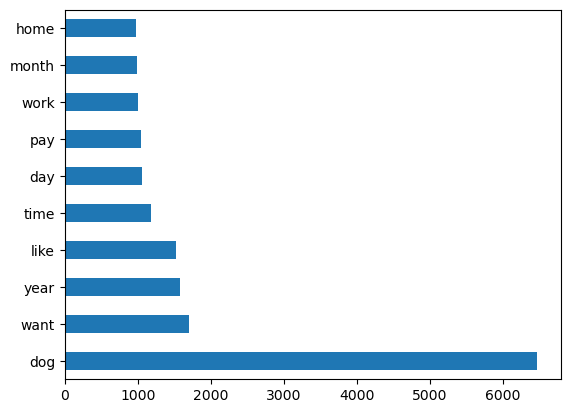

In [25]:
X_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

In [26]:
# Review the TTS X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # Convert text to numerical data
y = df['subreddit']

In [28]:
#baseline score
y_test.value_counts(normalize=True)

subreddit
personalfinance    0.621928
dogs               0.378072
Name: proportion, dtype: float64

In [29]:
most_freq = y_train.mode()[0]
baseline = (y_train == most_freq).mean()
print(f"Baseline Accuracy: {baseline:.2f}")

Baseline Accuracy: 0.62


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr_model_pred = lr_model.predict(X_test)
lr_model_pred;

In [35]:
accuracy = accuracy_score(y_test, lr_model_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


In [36]:
lr_model.score(X_train, y_train)

1.0

In [37]:
lr_model.score(X_test, y_test)

0.9867674858223062

In [38]:
df['predicted_subreddit'] = df['text'].apply(lambda x: lr_model.predict(vectorizer.transform([x]))[0])

In [39]:
df.head()

,subreddit,title,selftext,utc,text,predicted_subreddit
0,dogs,Best pet friendly couches,I am looking to replace my couches and looking...,1.732064e+09,Best pet friendly couch : I looking replace co...,dogs
1,dogs,Hello beautiful dog owners!,I got offered a Pembroke puppy. She’s lower p...,1.732061e+09,Hello beautiful dog owners! : I got offered Pe...,dogs
2,dogs,best dog breed for a nervous cat?,hi! hope im doing this right lol i dont use re...,1.732055e+09,best dog breed nervous cat? : hi! hope im righ...,dogs
3,dogs,Can I train my dog to like soft toys without r...,I have the sweetest 5 y/o Newfie with quite a ...,1.732039e+09,Can I train dog like soft toy without ripping ...,dogs
4,dogs,Megathread: Why Does My Dog Do That?,Does your dog turn his head when he hears an o...,1.732036e+09,Megathread: Why Does My Dog Do That? : Does do...,dogs


In [40]:
new_data = [
    "What breed is best for a small apartment?",
    "What are the top 5 ways to start for retirement?",
    "My pup loves playing fetch",
    "How can I invest in index funds?"
]

In [44]:
def predict_subreddit(new_posts):
    # Preprocess the new posts
    new_posts_processed = [preprocess_text(post) for post in new_posts]
    # Vectorize the preprocessed text
    new_posts_vec = vectorizer.transform(new_posts_processed)
    # Predict the subreddits using the model
    predictions = lr_model.predict(new_posts_vec)
    return predictions

In [45]:
df_new = pd.DataFrame(new_data, columns=["text"])

In [46]:
predictions = predict_subreddit(new_data)
for post, prediction in zip(new_data, predictions):
    print(f"Post: {post}\nPredicted subreddit: {prediction}\n")

Post: What breed is best for a small apartment?
Predicted subreddit: personalfinance

Post: What are the top 5 ways to start for retirement?
Predicted subreddit: personalfinance

Post: My pup loves playing fetch
Predicted subreddit: dogs

Post: How can I invest in index funds?
Predicted subreddit: personalfinance



In [47]:
# Step 3: Add the predictions as a new column
df_new["predicted_subreddit"] = predictions

# Step 4: Display the resulting DataFrame
df_new.head()

,text,predicted_subreddit
0,What breed is best for a small apartment?,personalfinance
1,What are the top 5 ways to start for retirement?,personalfinance
2,My pup loves playing fetch,dogs
3,How can I invest in index funds?,personalfinance


In [125]:
stop_words = set(stopwords.words('english'))  # Default stop words
df['processed_text'] = df['text']

In [48]:
new_post = "mans best friend"

In [50]:
newes_t = "What bank should I use?"

In [26]:
#Encode target
encoder = LabelEncoder()
y = encoder.fit_transform(df['subreddit'])

In [27]:
#Build the model; Logistic Regression and Random Forest
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate model
lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_preds)

ValueError: could not convert string to float: 'Should I pay my car loan? Bought a used car and financed 22k at 6% (72m) over the weekend. I have 40k in a HYSA. Should I just pay this off right away? My Int rate in my HYSA is around 4%. Kind of want to just get it off my shoulders and not have to think about it but also having 40k in savings feels nice. Any advice would be much appreciated! Thanks. '

In [ ]:
print("Logistic Regression:\n", classification_report(y_test, y_pred))

In [ ]:
lr_accuracy

In [ ]:
rf = RandomForestClassifier()  
rf.fit(X_train, y_train)  
rf_preds = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_preds)

In [ ]:
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

In [ ]:
rf_accuracy

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')

plt.show()

In [ ]:
baseline_accuracy = y_test.value_counts(normalize=True)

In [ ]:
# Print model comparison
print("Logistic Regression vs Random Forest Comparison:")
print(f"Logistic Regression - Accuracy: {lr_accuracy}")
print(f"Random Forest - Accuracy: {rf_accuracy}")
